In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import theano
theano.config.compute_test_value = "ignore"
theano.config.compiler = "fast_compile"

import numpy.random as nr

print('Running on PyMC3 v{}'.format(pm.__version__))
import theano.tensor as tt
from theano import config
print(config.compute_test_value)


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Running on PyMC3 v3.3
ignore


In [2]:
df=pd.read_csv("data.csv")

In [3]:
frames = {}

for x in range(1,21):
    #do some calcs to get a dataframe called 'df'
    frames[x] = df[df['ncomp']==x]

In [4]:
sigma=frames[1]['Y_unc'].values
Y=frames[1]['Y'].values

In [5]:
x1_=np.array([[frames[1]['x1'].values, frames[2]['x1'].values, frames[3]['x1'].values, frames[4]['x1'].values, frames[5]['x1'].values, frames[6]['x1'].values, frames[7]['x1'].values, frames[8]['x1'].values, frames[9]['x1'].values, frames[10]['x1'].values, frames[11]['x1'].values, frames[12]['x1'].values, frames[13]['x1'].values, frames[14]['x1'].values, frames[15]['x1'].values, frames[16]['x1'].values, frames[17]['x1'].values, frames[18]['x1'].values, frames[19]['x1'].values, frames[20]['x1'].values]])

In [6]:
x2_=np.array([[frames[1]['x2'].values, frames[2]['x2'].values, frames[3]['x2'].values, frames[4]['x2'].values, frames[5]['x2'].values, frames[6]['x2'].values, frames[7]['x2'].values, frames[8]['x2'].values, frames[9]['x2'].values, frames[10]['x2'].values, frames[11]['x2'].values, frames[12]['x2'].values, frames[13]['x2'].values, frames[14]['x2'].values, frames[15]['x2'].values, frames[16]['x2'].values, frames[17]['x2'].values, frames[18]['x2'].values, frames[19]['x2'].values, frames[20]['x2'].values]])

In [7]:
x3_=np.array([[frames[1]['x3'].values, frames[2]['x3'].values, frames[3]['x3'].values, frames[4]['x3'].values, frames[5]['x3'].values, frames[6]['x3'].values, frames[7]['x3'].values, frames[8]['x3'].values, frames[9]['x3'].values, frames[10]['x3'].values, frames[11]['x3'].values, frames[12]['x3'].values, frames[13]['x3'].values, frames[14]['x3'].values, frames[15]['x3'].values, frames[16]['x3'].values, frames[17]['x3'].values, frames[18]['x3'].values, frames[19]['x3'].values, frames[20]['x3'].values]])

In [8]:
x1_=theano.shared(x1_)
x2_=theano.shared(x2_)
x3_=theano.shared(x3_)

In [9]:
n = x1_.eval().shape[1]
with pm.Model() as basic_model:
    # Priors for unknown model parameters
    b1 = pm.Uniform('b1', lower=0.3, upper=0.5, testval=0.45)
    b3 = pm.Uniform('b3', lower=0.3, upper=0.5, testval=0.45)
    alpha = pm.Uniform('alpha', lower=0.7, upper=1, testval=0.8)
    x1 = pm.Categorical('x1', np.ones(n)/n,testval=5)
    x2 = pm.Categorical('x2', p=np.ones(n)/n)
    x3  =pm.Categorical('x3', p=np.ones(n)/n)

    x1_vec=x1_[0, x1]
    x2_vec=x2_[0, x2]
    x3_vec=x3_[0, x3]

    out= 12*(b1*x1_vec+b3*x2_vec+x3_vec)/alpha

    Y_obs = pm.Normal('Y_obs', mu=out, sd=sigma, observed=Y)
    step=pm.Metropolis(blocked=True)
    trace = pm.sample(1000,step,njobs=2,tune=False, progressbar=True)

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [x3, x2, x1, alpha_interval__, b3_interval__, b1_interval__]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


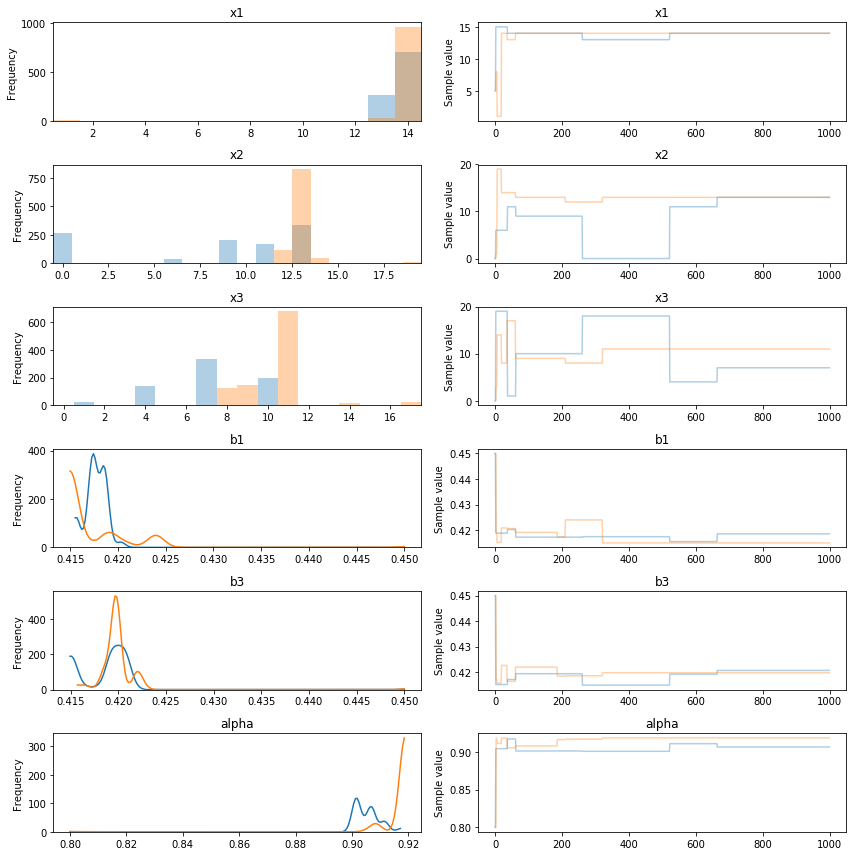

In [10]:
import matplotlib.pyplot as plt
pm.traceplot(trace)
plt.show()